In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction import text 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

In [2]:
# df = pd.read_csv(r"C:\Suvrat\Machine Learning\STC\complaints-2024-09-28_13_00.csv")
df = pd.read_csv(r"C:\Suvrat\Machine Learning\STC\complaints-2024-09-28_12_02.csv")


In [3]:
df1 = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint'] 

df1.shape

(161891, 2)

In [4]:
df1 = df1.sample(10000, random_state=1).copy()

In [5]:
df1.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other',
              
              'Debt collection': 'Debt collection',
              
             'Credit card and Prepaid card': 'Credit card or prepaid card',
              'Checking or savings account': 'Checking or savings account',
              
             'Payday loan, title loan, or personal loan': 'Loan',
             'Mortgage': 'Loan',
             'Student loan': 'Loan',
             'Vehicle loan or lease': 'Loan',
              
             'Money transfer': 'Money transfer, virtual currency, or money service'}}, 
            inplace=True)


In [6]:
category_counts = df1['Product'].value_counts()
print(category_counts)

Product
Credit reporting, repair, or other                    5238
Debt collection                                       1570
Loan                                                  1318
Credit card or prepaid card                           1034
Checking or savings account                            564
Money transfer, virtual currency, or money service     276
Name: count, dtype: int64


In [7]:
df1['category_id'] = df1['Product'].factorize()[0]
category_id_df = df1[['Product', 'category_id']].drop_duplicates()

# The factorize() function assigns a unique integer ID to each unique category in the Product column. 
# This is useful for converting categorical variables into numerical format


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
# print(category_to_id)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# category_to_id: Maps each product category to its corresponding numerical ID.
# id_to_category: Maps each numerical ID back to its corresponding product category.

# New dataframe
df1.head()

,Product,Consumer_complaint,category_id
4823,"Credit reporting, repair, or other",Contacted XXXX numerous times since I was mad...,0
149328,"Credit reporting, repair, or other",On XX/XX/2020 I sent a letter regarding inaccu...,0
203695,"Credit reporting, repair, or other",My identity has been compromised. I found out ...,0
337449,Debt collection,I have asked them to remove this account off o...,1
42616,"Credit reporting, repair, or other",In 2015 my father suffered a debilitating illn...,0


In [8]:
stop_words_adjusted = text.ENGLISH_STOP_WORDS.union(['xx','xxxx','xxxxxxxx','00'])

stop_words_adjusted = list(stop_words_adjusted)

In [9]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a set of stop words
stop_words = set(stopwords.words('english')).union(['xx', 'xxxx', 'xxxxxxxx', '00'])

def preprocess_text(text):
    # Tokenize the text
    words = text.split()
    # Remove stop words and lemmatize
    cleaned_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(cleaned_words)


In [10]:
# 
# # tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
# #                         ngram_range=(1, 2), 
# #                         stop_words='english')

# # # Transform complaints into feature vectors
# features = tfidf.fit_transform(df1["Consumer_complaint"]).toarray()
# labels = df1.category_id
# labels = df1['category_id']



# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(features, labels, 
#                                                     test_size=0.25, 
#                                                     random_state=0)

# # Apply SMOTE to the training set
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # Train the model
# model = LinearSVC()
# model.fit(X_resampled, y_resampled)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Generate classification report for test set
# print('\t\t\t\tCLASSIFICATION METRICS\n')
# print(metrics.classification_report(y_test, y_pred, 
#                                     target_names=df1['Product'].unique()))


In [11]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
#                         ngram_range=(1, 2), 
#                         stop_words='english')

# # We transform each complaint into a vector
# features = tfidf.fit_transform(df1["Consumer_complaint"]).toarray()

# labels = df1.category_X = df1['Consumer_complaint'] # Collection of documents
# y = df1['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

In [12]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
#                         ngram_range=(1, 2), 
#                         stop_words='english')

# # Transform each complaint into a vector
# features = tfidf.fit_transform(df1["Consumer_complaint"]).toarray()

# # Step 2: Correctly define labels and features
# y = df1['Product']  # Target labels (product categories)

# # Step 3: Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(features, y, 
#                                                     test_size=0.25,
#                                                     random_state=0)

# # Step 4: Apply SMOTE on the training data
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [13]:
# df1['Consumer_complaint'] = df1['Consumer_complaint'].apply(preprocess_text)



# We transform each complaint into a vector


# labels = df1.category_X = df1['Consumer_complaint'] # Collection of documents

In [14]:
# df1['Consumer_complaint'] = df1['Consumer_complaint'].apply(preprocess_text)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
features = tfidf.fit_transform(df1["Consumer_complaint"]).toarray()
labels = df1.category_id


In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                     test_size=0.25,
                                                     random_state=0)

original_counts = y_train.value_counts()
print("Original class distribution:")
print(original_counts)


Original class distribution:
category_id
0    3919
1    1190
2    1007
4     766
3     419
5     199
Name: count, dtype: int64


In [16]:
smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train.values.reshape(-1, 1), y_train)  # Reshape if necessary
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

resampled_counts = y_resampled.value_counts()
print("Resampled class distribution:")
print(resampled_counts)

Resampled class distribution:
category_id
0    3919
2    3919
4    3919
1    3919
5    3919
3    3919
Name: count, dtype: int64


In [17]:

# labels = df1.category_id

models = [
    LinearSVC(),
    # LogisticRegression(random_state=0)
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_resampled, y_resampled, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

In [18]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()
acc = pd.concat([mean_accuracy, std_accuracy], axis=1, 
                 ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc


,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.97376,0.006755


In [19]:
# model = LinearSVC(class_weight='balanced')
# model = LinearSVC()
model = LinearSVC(C=10)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)



C:\Users\suvra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [20]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df1['Product'].unique()))




				CLASSIFICATIION METRICS

                                                    precision    recall  f1-score   support

                Credit reporting, repair, or other       0.90      0.90      0.90      1319
                                   Debt collection       0.74      0.76      0.75       380
                                              Loan       0.78      0.83      0.80       311
                       Checking or savings account       0.78      0.72      0.75       145
                       Credit card or prepaid card       0.68      0.68      0.68       268
Money transfer, virtual currency, or money service       0.72      0.64      0.68        77

                                          accuracy                           0.83      2500
                                         macro avg       0.77      0.75      0.76      2500
                                      weighted avg       0.83      0.83      0.83      2500



In [21]:
# Calculate training accuracy
training_accuracy = model.score(X_resampled, y_resampled)

# Calculate test accuracy
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 1.00
Test Accuracy: 0.83


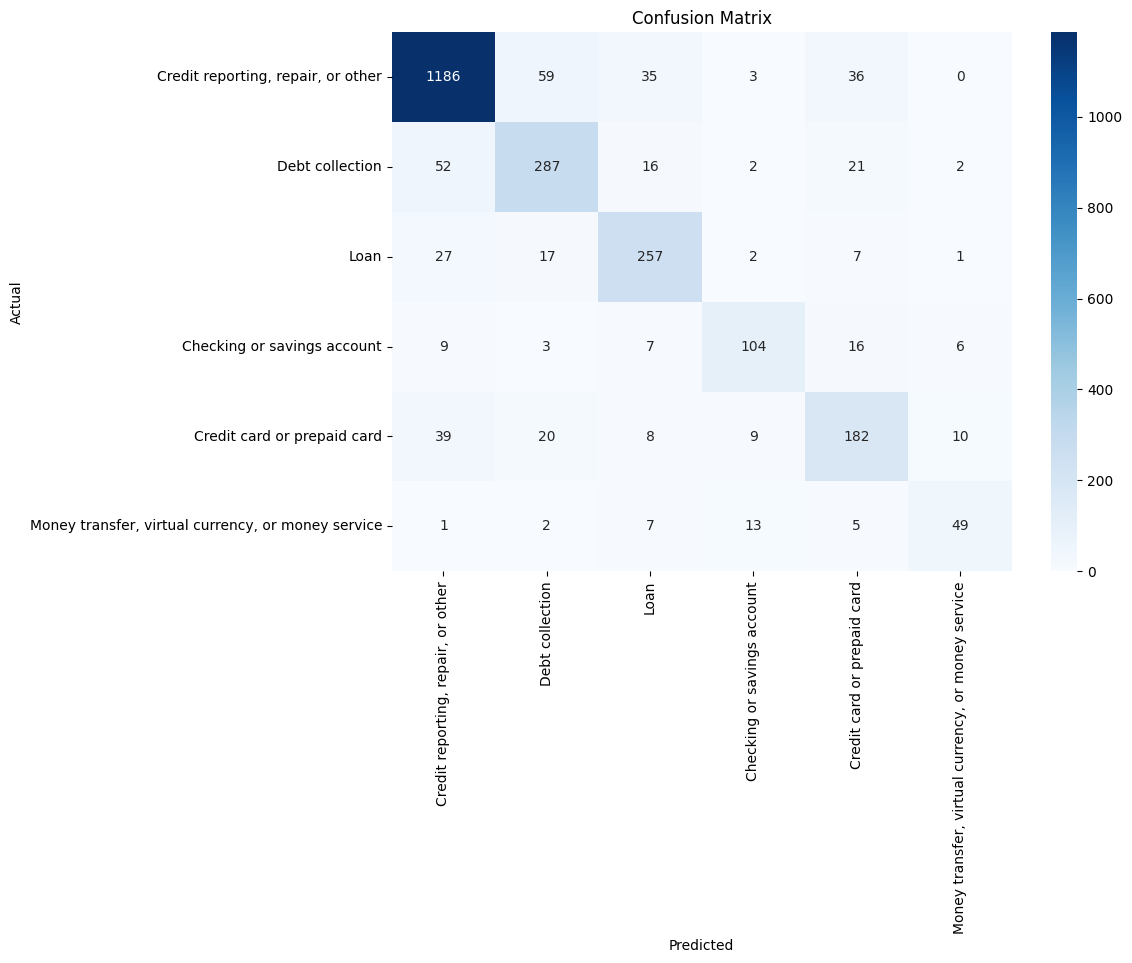

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df1['Product'].unique(), yticklabels=df1['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [23]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.01, 0.1, 1, 10],
#     'max_iter': [100, 200, 300]
# }
# grid = GridSearchCV(LinearSVC(), param_grid, cv=5, scoring='accuracy')
# grid.fit(X_resampled, y_resampled)

# print(f"Best parameters: {grid.best_params_}")
# print(f"Best cross-validated score: {grid.best_score_:.2f}")

In [24]:
# category_counts = df1['Product'].value_counts()

# Product
# Credit reporting, repair, or other                    5238
# Debt collection                                       1570
# Loan                                                  1318
# Credit card or prepaid card                           1034
# Checking or savings account                            564
# Money transfer, virtual currency, or money service     276
# df1['category_id'] = df1['Product'].factorize()[0]
# category_id_df = df1[['Product', 'category_id']].drop_duplicates()

# Product	Consumer_complaint	category_id
# 4823	Credit reporting, repair, or other	Contacted XXXX numerous times since I was mad...	0
# 149328	Credit reporting, repair, or other	On XX/XX/2020 I sent a letter regarding inaccu...	0
# 203695	Credit reporting, repair, or other	My identity has been compromised. I found out ...	0
# 337449	Debt collection	I have asked them to remove this account off o...	1
# 42616	Credit reporting, repair, or other	In 2015 my father suffered a debilitating illn...	0

# stop_words_adjusted = text.ENGLISH_STOP_WORDS.union(['xx','xxxx','xxxxxxxx','00'])
# stop_words_adjusted = list(stop_words_adjusted)# Initialize lemmatizer
# lemmatizer = WordNetLemmatizer()
# stop_words = set(stopwords.words('english')).union(['xx', 'xxxx', 'xxxxxxxx', '00'])
# def preprocess_text(text):
#     words = text.split()
#     cleaned_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
#     return ' '.join(cleaned_words)

# df1['Consumer_complaint'] = df1['Consumer_complaint'].apply(preprocess_text)
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
#                         ngram_range=(1, 2), 
#                         stop_words='english')

# features = tfidf.fit_transform(df1["Consumer_complaint"]).toarray()
# X = df1['Consumer_complaint'] # Collection of documents
# y = df1['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

# X_train, X_test, y_train, y_test = train_test_split(features, y, 
#                                                      test_size=0.25,
#                                                      random_state=0)
#  labels = df1.category_id
# smote = SMOTE(random_state=42)

# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# models = [
#     LinearSVC(),
   
# ]
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []
# for model in models:
#     model_name = model.__class__.__name__
#     accuracies = cross_val_score(model, X_resampled, y_resampled, scoring='accuracy', cv=CV)
#     for fold_idx, accuracy in enumerate(accuracies):
#         entries.append((model_name, fold_idx, accuracy))
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
# std_accuracy = cv_df.groupby('model_name').accuracy.std()
# acc = pd.concat([mean_accuracy, std_accuracy], axis=1, 
#                  ignore_index=True)
# acc.columns = ['Mean Accuracy', 'Standard deviation']
# acc
# model = LinearSVC()
# model.fit(X_resampled, y_resampled)
# y_pred = model.predict(X_test)

# print('\t\t\t\tCLASSIFICATIION METRICS\n')
# print(metrics.classification_report(y_test, y_pred, 
#                                     target_names= df1['Product'].unique()))